# Number Recognition

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1130 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0770 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9864


In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 1ms/step - loss: 0.0922 - accuracy: 0.9726
Test Accuracy: 0.972599983215332


In [8]:
predictions = model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


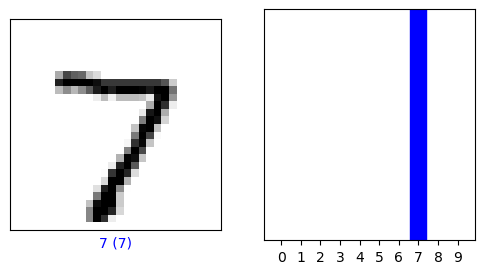

In [9]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0  # Change this value to see different predictions
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels[i])
